# 1.0 Introduction

We analyze a collection of 116909 Colombia event mentions between 09/11/2016 and 06/17/2017 collected from the GDELT's Event Mentions (<em>[gdelt-bq:gdeltv2.eventmentions]</em>) table. The Event Mentions table records every mention of an event over time, along with the timestamp the article was published. This allows the progression of an event through the global media to be tracked, identifying outlets that tend to break certain kinds of events the earliest or which may break stories later but are more accurate in their reporting on those events. Combined with the 15 minute update resolution and GCAM, the Event Mentions table also allows the emotional reaction and resonance of an event to be assessed as it sweeps through the world’s media. We begin by identifying the most prominent media type and languages for all event mentions, then we computer the event tone and confidence distribution for all event mentions in the data set. We then identify the dominant sources with the Top 50 event mention frequencies, filter the sources relevant to the Peace Accords Matrix (PAM) implementation monitoring and verification framework, and compare their language composition as well as tone and confidence distributions.

In [60]:
# Import useful libraries
import re
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from collections import Counter
from collections import OrderedDict 
from NewspaperLanguages import translations
from sklearn.neighbors.kde import KernelDensity
# Set global options
%matplotlib inline 
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-whitegrid')
# Set matplotlib color scheme
colors = cm.Set3(np.linspace(0, 1, len(labels)))
# Declare global variables
all_mentions = pd.read_csv('all_mentions.csv', encoding='latin-1').sort_values('EventTimeDate', ascending=1)
all_mentions.columns

Index(['GLOBALEVENTID', 'EventTimeDate', 'MentionTimeDate', 'MentionType',
       'MentionSourceName', 'MentionIdentifier', 'SentenceID',
       'Actor1CharOffset', 'Actor2CharOffset', 'ActionCharOffset', 'InRawText',
       'Confidence', 'MentionDocLen', 'MentionDocTone',
       'MentionDocTranslationInfo', 'Extras'],
      dtype='object')

In [61]:
len(all_mentions)

116909

# 2.0 Media Analysis

As an event is mentioned across multiple news reports, each of those mentions is recorded in the Mentions table, along with several key indicators about that mention, including the location within the article where the mention appeared (in the lead paragraph versus being buried at the bottom) and the “confidence” of the algorithms in their identification of the event
from that specific news report. 

## 2.1 Media Types

OrderedDict([(1, 116787), (2, 122)])


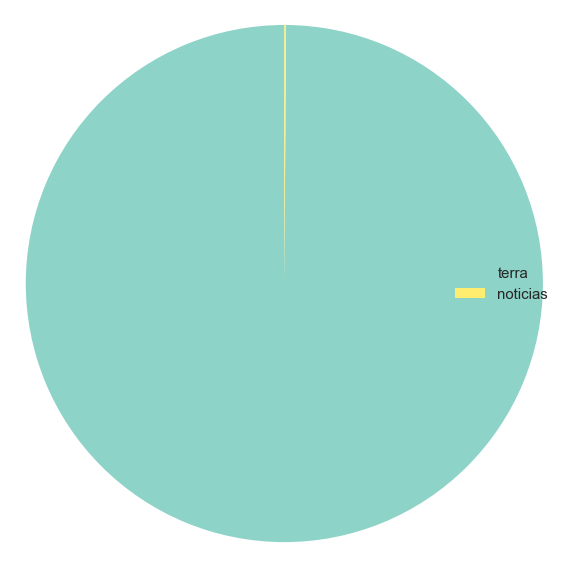

In [62]:
MentionTypes = Counter(all_mentions.MentionType)

MentionTypeCodes = {1:["WEB","The document originates from the open web and the MentionIdentifier is a fully-qualified URL that can be used to access the document on the web"],
                   2:["CITATIONONLY", "The document originates from a broadcast, print, or other offline source in which only a textual citation is available for the document.  In this case the MentionIdentifier contains the textual citation for the document"],
                   3:["CORE", "The document originates from the CORE archive and the MentionIdentifier contains its DOI, suitable for accessing the original document through the CORE website"],
                   4:["DTIC", "The document originates from the DTIC archive and the MentionIdentifier contains its DOI, suitable for accessing the original document through the DTIC website"],
                   5:["JSTOR", "The document originates from the JSTOR archive and the MentionIdentifier contains its DOI, suitable for accessing the original document through your JSTOR subscription if your institution subscribes to it"],
                   6:["NONTEXTUALSOURCE", "The document originates from a textual proxy (such as closed captioning) of a non-textual information source (such as a video) available via a URL and the MentionIdentifier provides the URL of the non-textual original source.  At present, this Collection Identifier is used for processing of the closed captioning streams of the Internet Archive Television News Archive in which each broadcast is available via a URL, but the URL offers access only to the video of the broadcast and does not provide any access to the textual closed captioning used to generate the metadata.  This code is used in order to draw a distinction between URL-based textual material (Collection Identifier 1 (WEB) and URL-based non-textual material like the Television News Archive"]
                  }

MentionTypes = OrderedDict(sorted(MentionTypes.items(), key=lambda x: x[1], reverse=True))
mention_type_labels = [MentionTypeCodes[key][0] for key in list(MentionTypes.keys())]
mention_type_sizes = list(MentionTypes.values())
print(MentionTypes)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax = plt.subplots(figsize=(8, 8))
colors = cm.Set3(np.linspace(0, 1, len(mention_type_labels)))
patches, texts = plt.pie(mention_type_sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="right", fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.2 Media Languages

Counter({'English': 56400, 'Spanish': 50211, 'French': 2885, 'Portuguese': 2191, 'Other': 2107, 'German': 1202, 'Arabic': 900, 'Russian': 392, 'Italian': 294, 'Danish': 142, 'Norwegian': 111, 'Swedish': 70, 'Hungarian': 2, 'Hebrew': 2})


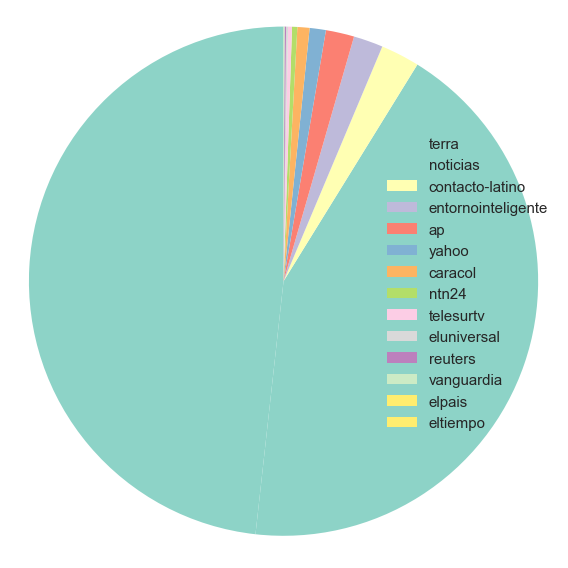

In [63]:
languages = []
for lang in all_mentions.MentionDocTranslationInfo:
    try:
        languages.append(translations[lang][1])
    except:
        languages.append('English')
        
all_mentions['Language'] = languages
        
languages = Counter(languages)
print(languages)
        
languages = OrderedDict(sorted(languages.items(), key=lambda x: x[1], reverse=True))
language_labels = [key for key in list(languages.keys())]
language_sizes = list(languages.values())
     
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax = plt.subplots(figsize=(8, 8))
colors = cm.Set3(np.linspace(0, 1, len(language_labels)))
patches, texts = plt.pie(language_sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="right", fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.3 Tone Distribution

count    116909.000000
mean    -0.860289     
std      3.701209     
min     -17.821782    
25%     -3.225806     
50%     -0.847458     
75%      1.636905     
max      23.333333    
Name: MentionDocTone, dtype: float64


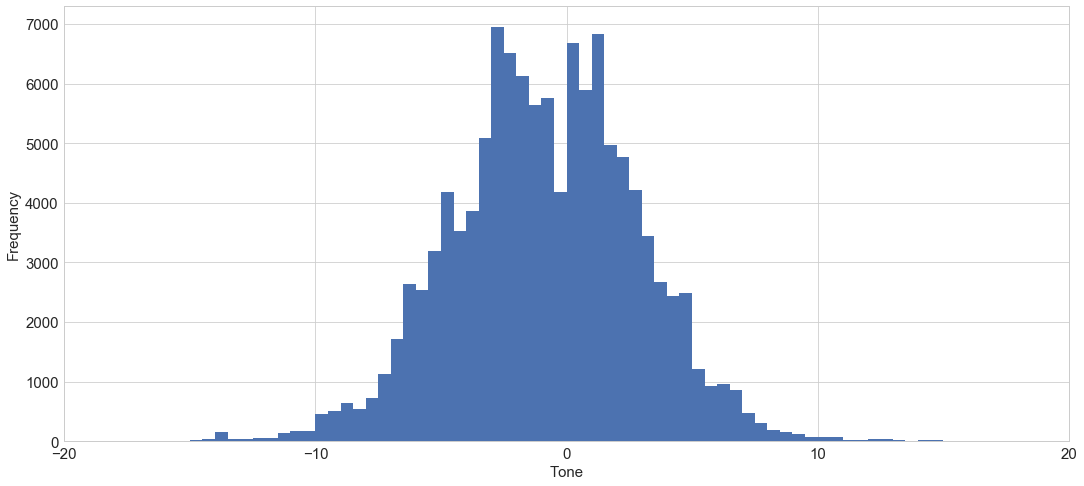

In [64]:
fig1, ax = plt.subplots(figsize=(18, 8))
tone = np.array(list(all_mentions.MentionDocTone))
#kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(tone)
print(all_mentions.MentionDocTone.describe())
plt.hist(tone, bins=100, range=(-20,30), histtype='bar', align='mid', orientation='vertical')
#sns.distplot(tone, bins=100, kde=True)
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency' , fontsize=15)
ax.set_xlabel('Tone', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(-20, 50, 10))
#plt.xticks(ind + width*.5)
#ax.set_xticklabels(labels)
plt.xlim([-20,20])
#ax.set_xticklabels(labels[::10])
plt.show()

## 2.4 Confidence Distribution

Percent confidence in the extraction of this event from this article.  See the discussion in the codebook at http://data.gdeltproject.org/documentation/GDELT-Event_Codebook-V2.0.pdf

The Confidence measure is a new feature in GDELT 2.0 that makes it possible to adjust the sensitivity of GDELT towards specific use cases. Those wishing to find the earliest glimmers of breaking events or reports of very small-bore events that tend to only appear as part of period “round up” reports, can use the entire event stream, while those wishing to find only the largest
events with strongly detailed descriptions, can filter the Event stream to find only those events with the highest Confidence measures. 

It also makes it possible to identify the “best” news report to return for a given event (filtering all mentions of an event for those with the highest Confidence scores, most prominent positioning within the article, and/or in a specific source language – such as Arabic coverage of a protest versus English coverage of that protest)

(0, 100)

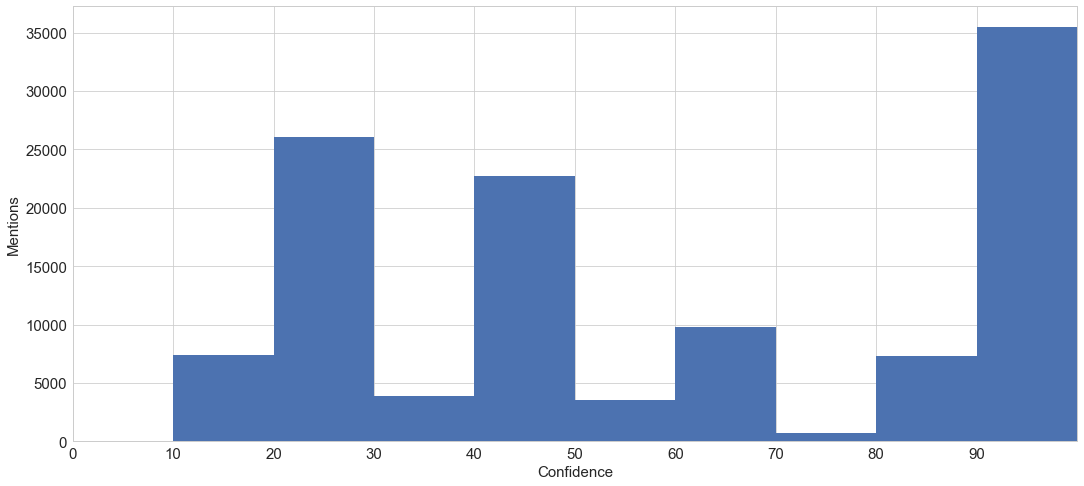

In [65]:
fig1, ax = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-paper')
values = list(all_mentions.Confidence)
plt.hist(values, bins=10, range=(0,100), histtype='bar', align='mid', orientation='vertical')
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Mentions' , fontsize=15)
ax.set_xlabel('Confidence', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, 100, 10))
#plt.xticks(ind + width*.5)
#ax.set_xticklabels(labels)
plt.xlim([0,100])
#ax.set_xticklabels(labels[::10])
#plt.xlim([-1,50])

## 2.5 Dominant Sources

[('terra', 5390), ('noticias', 1680), ('contacto-latino', 1642), ('entornointeligente', 1450), ('ap', 1337), ('yahoo', 1229), ('caracol', 914), ('ntn24', 762), ('telesurtv', 729), ('eluniversal', 715), ('reuters', 701), ('vanguardia', 699), ('elpais', 672), ('eltiempo', 653), ('elespectador', 593), ('aguasdigital', 567), ('colombiareports', 532), ('telecinco', 507), ('prensa-latina', 495), ('elcomercio', 470), ('elheraldo', 434), ('oem', 426), ('wlox', 425), ('hawaiinewsnow', 415), ('rcnradio', 399), ('efe', 395), ('wradio', 390), ('radiosantafe', 387), ('informativo', 383), ('xinhuanet', 376), ('dailymail', 374), ('lainformacion', 368), ('kswo', 368), ('panampost', 366), ('foxnews', 366), ('ksby', 364), ('worldbulletin', 348), ('wn', 343), ('uol', 337), ('wandtv', 335), ('notimerica', 334), ('bbc', 328), ('wboc', 326), ('publimetro', 322), ('minuto30', 320), ('wect', 308), ('dw', 295), ('sputniknews', 295), ('lanacion', 284), ('el-carabobeno', 281)]


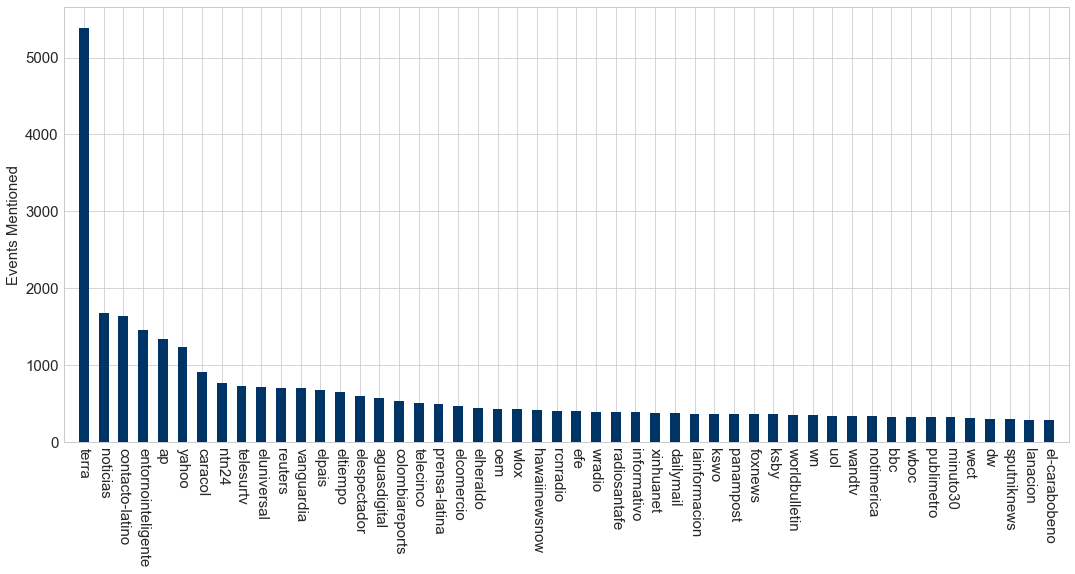

In [66]:
clean_names = []

for sourcename in all_mentions.MentionSourceName:
    try:
        clean_names.append(re.search('(.*?)\.', sourcename).group(1))
    except:
        clean_names.append('nan')
        
all_mentions['SourceName'] = clean_names

MentionSourceNames = Counter(clean_names).most_common(50)
print(MentionSourceNames)
labels = [MentionSourceNames[i][0] for i in range(len(MentionSourceNames))]
values = [MentionSourceNames[i][1] for i in range(len(MentionSourceNames))]
     
ind = np.arange(len(values)) 

width = 0.5

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Events Mentioned' , fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.bar(ind, values, width, color='#003366')
#ax.set_yticks(np.arange(0, 5500, 100))
ax.set_xticks(np.arange(0, len(labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
#plt.xticks(ind + width*.5)
#ax.set_xticklabels(labels)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::1])
plt.xlim([-1,50])
plt.show()

# 3.0 Source Filtering

## 3.1 Languages Comparison

In [67]:
names = ['Associated Press', 'Caracol', 'Reports', 'El Comercio', 'El Espectador', 'El Pais', 'El Tiempo', 'El Universal', 'Noticias', 'Vanguardia']
print('Associated Press: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'ap'].Language))
print('Caracol: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'caracol'].Language))
print('Reports: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'colombiareports'].Language))
print('El Comercio: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'elcomercio'].Language))
print('El Espectado: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'elespectador'].Language))
print('El Pais: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'elpais'].Language))
print('El Tiempo: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'eltiempo'].Language))
print('El Universal: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'eluniversal'].Language))
print('Noticias: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'noticias'].Language))
print('Vanguardia: ', Counter(all_mentions.loc[all_mentions['SourceName'] == 'vanguardia'].Language))

Associated Press:  Counter({'English': 1337})
Caracol:  Counter({'Spanish': 914})
Reports:  Counter({'English': 532})
El Comercio:  Counter({'Spanish': 470})
El Espectado:  Counter({'Spanish': 593})
El Pais:  Counter({'Spanish': 618, 'English': 54})
El Tiempo:  Counter({'Spanish': 643, 'English': 10})
El Universal:  Counter({'Spanish': 714, 'English': 1})
Noticias:  Counter({'Spanish': 1680})
Vanguardia:  Counter({'Spanish': 699})


## 3.2 Tone Comparison

In [68]:
def compare_sources(compare_by):
    ap = list(all_mentions.loc[all_mentions['SourceName'] == 'ap'][compare_by])
    caracol = list(all_mentions.loc[all_mentions['SourceName'] == 'caracol'][compare_by])
    colombiareports = list(all_mentions.loc[all_mentions['SourceName'] == 'colombiareports'][compare_by])
    elcomercio = list(all_mentions.loc[all_mentions['SourceName'] == 'elcomercio'][compare_by])
    elespectador = list(all_mentions.loc[all_mentions['SourceName'] == 'elespectador'][compare_by])
    elpais = list(all_mentions.loc[all_mentions['SourceName'] == 'elpais'][compare_by])
    eltiempo = list(all_mentions.loc[all_mentions['SourceName'] == 'eltiempo'][compare_by])
    eluniversal = list(all_mentions.loc[all_mentions['SourceName'] == 'eluniversal'][compare_by])
    noticias = list(all_mentions.loc[all_mentions['SourceName'] == 'noticias'][compare_by])
    vanguardia = list(all_mentions.loc[all_mentions['SourceName'] == 'vanguardia'][compare_by])

    myList = [ap] + [caracol] + [colombiareports] + [elcomercio] + [elespectador] + [elpais] + [eltiempo] + [eluniversal] + [noticias] + [vanguardia]

    return myList

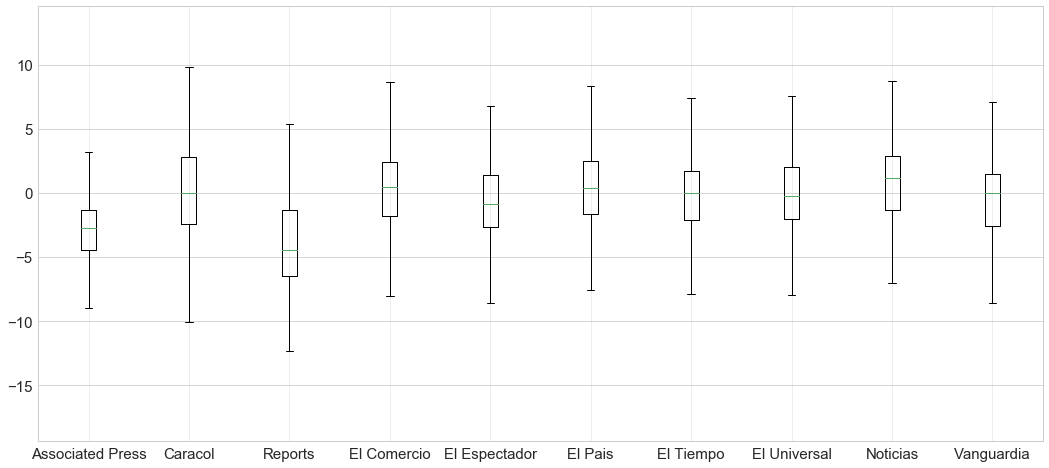

In [69]:
myList = compare_sources('MentionDocTone')

# set fig for boxplots
fig, ax = plt.subplots(figsize=(18, 8), sharex=True)
ax.set_title('', fontsize=15, fontweight='bold')
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for i,l in enumerate(myList):
    ax.boxplot(l, vert=True, positions = [i])

ax.set_xticks(range(len(myList)))
ax.set_xticklabels(names)

ax.set_xlim(-0.5, len(myList)-0.5)

plt.show()

## 3.3 Confidence Comparison

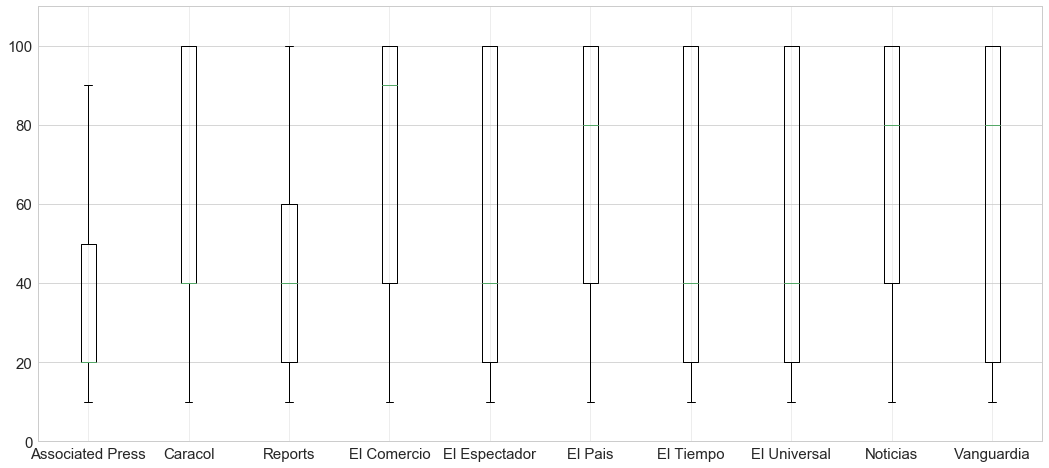

In [70]:
myList = compare_sources('Confidence')

# set fig for boxplots
fig, ax = plt.subplots(figsize=(18, 8), sharex=True)
ax.set_title('', fontsize=15, fontweight='bold')
# Add a horizontal grid to the plot
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

for i,l in enumerate(myList):
    ax.boxplot(l, vert=True, positions = [i])

ax.set_xticks(range(len(myList)))
ax.set_xticklabels(names)

ax.set_xlim(-0.5, len(myList)-0.5)
ax.set_ylim(0, 110)

plt.show()